# When to go for a KOM on Strava
Load a previously pickled leaderboard.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
LB = pd.read_pickle('/Users/Gavin/Gavin/jupyter/Strava/610040_LB.pkl')

The first striking observation is that hardly anyone sets a PB during the winter. The following chart shows that most records were set between June and September.

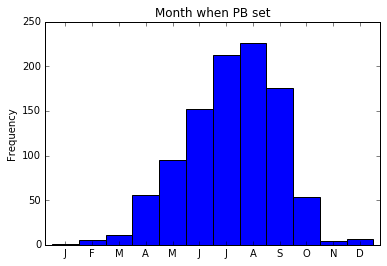

In [3]:
# The month in which PBs are set
ax=LB.start_date_local.dt.month.value_counts().reindex(np.arange(1,13)).plot(kind='bar', xlim=(1,12), title='Month when PB set', width=1)
ax.set_xticklabels( ['J','F','M','A','M','J','J','A','S','O','N','D'],rotation='horizontal')
ax.set_ylabel('Frequency')
plt.savefig('MonthPlot.png')



This suggests that riders tend to be in better form in the summer and that conditions are more favourable. In fact, it turns out that hours of daylight play an important role, as demonstrated by the following chart showing that most PBs are set either in the evening, around 7pm or in the early morning, between 6am and 9am. These represent times before or after work, when car traffic is lighter. Very few records are set in during the middle of the day and none at night.

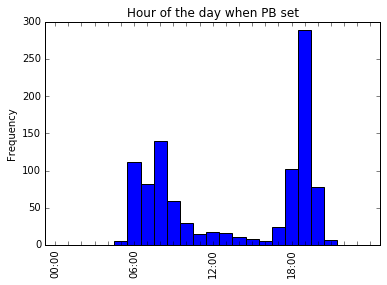

In [4]:
# The times at which PBs are set
fig=plt.figure()
ax=LB.start_date_local.dt.hour.value_counts().reindex(np.arange(25)).plot(kind='bar',xlim=((0,24)),title='Hour of the day when PB set',width=1)
ax.set_xticklabels( ['00:00','','','','','','06:00','','','','','','12:00','','','','','','18:00','','','','',''],rotation='vertical')
ax.set_ylabel('Frequency')
plt.show()
fig.savefig('HourPlot.png')



A look at the days of the week, when record are set, reveals that Wednesday and Saturday are particularly popular. It turns out the most Wednesday records were achieved in the evening with some in morning, whereas almost all Saturday records were completed by 10am.

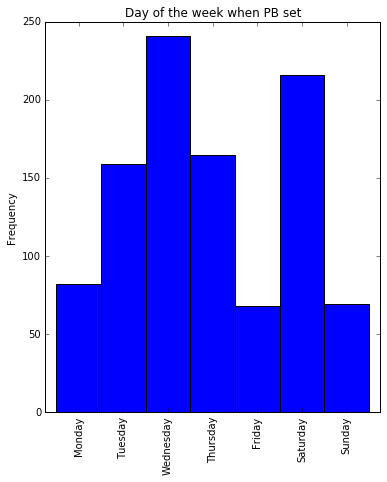

In [5]:
# The day of the week on which PBs are set
fig=plt.figure(figsize=(6, 7))
ax=LB.start_date_local.dt.weekday_name.value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar',title='Day of the week when PB set',width=1)
ax.set_ylabel('Frequency')
plt.show()
fig.savefig('WeekPlot.png')



So the best time to achieve a PB around Richmond Park is on a Wednesday evening in August. And it turns out that Rob Sharland set the KOM at 8:31pm on Wednesday 12 August 2015.

But Rob deserves additional kudos, because quite a few riders have set their personal bests riding in groups, whereas it looks like Rob was riding solo. Nine other riders set their PBs on the same day, but these were all earlier than Rob's. There were three other dates on which 10 or more riders achieved their fastest times. It is easy to spot those riding as a group, because they all start together and finish with similar times (<a href="leadboardgroups.pdf" target="_blank">show in red here</a>). So chapeau to Rob for beating them all.

In [6]:
# Most popular dates for PBs
popDates = LB.start_date_local.dt.date.value_counts()[:10]

# riders setting PB on the same day as rider position n in table
for d in popDates.index[[3,0,1,2]]:
    print(LB[['rank','athlete_name','elapsed_time','start_date_local']][LB.start_date_local.dt.date==d])


     rank      athlete_name  elapsed_time    start_date_local
196   193      James Ratzer      00:16:19 2016-09-07 06:35:00
204   202      Francis Jago      00:16:21 2016-09-07 06:34:54
352   340    Richard Beadle      00:16:49 2016-09-07 19:04:45
378   373       Adam Polski      00:16:54 2016-09-07 19:21:32
594   585  Greg Jadrijevich      00:17:17 2016-09-07 06:59:25
657   644       Andy Ainger      00:17:21 2016-09-07 06:51:39
680   661     Andy Matthews      00:17:22 2016-09-07 06:51:39
755   741   Charlie Linacre      00:17:27 2016-09-07 19:37:56
877   851     Mitchell Bell      00:17:34 2016-09-07 09:18:36
986   974     Craig Tomkins      00:17:41 2016-09-07 19:00:03
     rank               athlete_name  elapsed_time    start_date_local
7       7           Tom Percival RPR      00:14:14 2016-09-13 06:11:23
11     11  Joe Peake  (Goat RPR) CCL      00:14:31 2016-09-13 06:11:23
14     14             Alex Scutt RPR      00:14:41 2016-09-13 06:11:23
39     38            Greg Amann RP

In [2]:
LB.columns

Index(['activity_id', 'athlete_gender', 'athlete_id', 'athlete_name',
       'athlete_profile', 'average_hr', 'average_watts', 'distance',
       'effort_id', 'elapsed_time', 'moving_time', 'rank', 'start_date_local'],
      dtype='object')

In [4]:
LB.loc[851]

activity_id                                                    930587
athlete_gender                                                      F
athlete_id                                                       8309
athlete_name                                           Maryka Sennema
athlete_profile     https://dgalywyr863hv.cloudfront.net/pictures/...
average_hr                                                        167
average_watts                                                   220.2
distance                                                       9518.4
effort_id                                                    13806571
elapsed_time                                          0 days 00:17:34
moving_time                                           0 days 00:17:34
rank                                                              851
start_date_local                                  2010-06-10 19:43:02
Name: 851, dtype: object